In [ ]:
#ANALISES

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RAD_ESTADOS.csv to RAD_ESTADOS.csv
Saving QUIMIO_ESTADOS.csv to QUIMIO_ESTADOS.csv
Saving DADOS_COVID_POR_ESTADO.csv to DADOS_COVID_POR_ESTADO.csv


In [ ]:
df_quimio = pd.read_csv('QUIMIO_ESTADOS.csv') 
df_rad = pd.read_csv('RAD_ESTADOS.csv') 
df_covid = pd.read_csv('DADOS_COVID_POR_ESTADO.csv') 

In [ ]:
df_qui_brasil = df_quimio.groupby(['DTSOLIC', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
print(df_qui_brasil.shape)
df_qui_brasil.head()


(60, 3)


,DTSOLIC,ANO,QTD
0,28/02/2017,2017,49612
1,28/02/2018,2018,57559
2,28/02/2019,2019,62497
3,29/02/2016,2016,50561
4,29/02/2020,2020,66298


In [ ]:
df_rad_brasil = df_rad[df_rad.ANO > 2018].groupby(['DTSOLIC', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
print(df_rad_brasil.shape)
df_rad_brasil.head()

(23, 3)


,DTSOLIC,ANO,QTD
0,29/02/2020,2020,902
1,30/04/2019,2019,17
2,30/04/2020,2020,850
3,30/06/2019,2019,782
4,30/06/2020,2020,1110


In [ ]:

df_covid_brasil = df_covid.groupby(['FIM_MES', 'ano'], as_index=False, dropna=False)['casosNovos'].sum()
print(df_covid_brasil.shape)
df_covid_brasil.head()

(11, 3)


,FIM_MES,ano,casosNovos
0,2020-02-29,2020,2
1,2020-03-31,2020,5715
2,2020-04-30,2020,79663
3,2020-05-31,2020,428820
4,2020-06-30,2020,887841


In [ ]:
df_qui_brasil["DTSOLIC"] = df_qui_brasil["DTSOLIC"].astype("datetime64") 
df_rad_brasil["DTSOLIC"] = df_rad_brasil["DTSOLIC"].astype("datetime64") 
df_covid_brasil["FIM_MES"] = df_covid_brasil["FIM_MES"].astype("datetime64") 

In [ ]:
df_qui_brasil.head()

,DTSOLIC,ANO,QTD
0,2017-02-28,2017,49612
1,2018-02-28,2018,57559
2,2019-02-28,2019,62497
3,2016-02-29,2016,50561
4,2020-02-29,2020,66298


In [ ]:
df_rad_brasil.head()

,DTSOLIC,ANO,QTD
0,2020-02-29,2020,902
1,2019-04-30,2019,17
2,2020-04-30,2020,850
3,2019-06-30,2019,782
4,2020-06-30,2020,1110


In [ ]:
df_covid_brasil.head()

,FIM_MES,ano,casosNovos
0,2020-02-29,2020,2
1,2020-03-31,2020,5715
2,2020-04-30,2020,79663
3,2020-05-31,2020,428820
4,2020-06-30,2020,887841


In [ ]:
df_qui_brasil["MES"] = df_qui_brasil["DTSOLIC"].dt.month 
df_rad_brasil["MES"] = df_rad_brasil["DTSOLIC"].dt.month 
df_covid_brasil["MES"] = df_covid_brasil["FIM_MES"].dt.month 

In [ ]:
df_brasil = pd.DataFrame(columns=['idx', 'TIPO', 'DATA', 'ANO','MES', 'QTD'])
# COVID
for idx in range(0, df_qui_brasil.shape[0]):
  df_j = pd.DataFrame(
      [
        [idx,'QUIMIO', df_qui_brasil.loc[idx]['DTSOLIC'], df_qui_brasil.loc[idx]['ANO'], df_qui_brasil.loc[idx]['MES'], df_qui_brasil.loc[idx]['QTD']],
      ], columns=['idx','TIPO', 'DATA', 'ANO','MES', 'QTD'])

  df_brasil = pd.concat([df_brasil, df_j], ignore_index=True)

# RADIO
for idx in range(0, df_rad_brasil.shape[0]):
  df_j = pd.DataFrame(
      [
        [idx,'RADIO', df_rad_brasil.loc[idx]['DTSOLIC'], df_rad_brasil.loc[idx]['ANO'], df_rad_brasil.loc[idx]['MES'], df_rad_brasil.loc[idx]['QTD']],
      ], columns=['idx','TIPO', 'DATA', 'ANO','MES', 'QTD'])

  df_brasil = pd.concat([df_brasil, df_j], ignore_index=True)

#COVID
for idx in range(0, df_covid_brasil.shape[0]):
  df_j = pd.DataFrame(
      [
        [idx,'COVID', df_covid_brasil.loc[idx]['FIM_MES'], df_covid_brasil.loc[idx]['ano'], df_covid_brasil.loc[idx]['MES'], df_covid_brasil.loc[idx]['casosNovos']],
      ], columns=['idx','TIPO', 'DATA', 'ANO','MES', 'QTD'])

  df_brasil = pd.concat([df_brasil, df_j], ignore_index=True)

In [ ]:
print(df_brasil.shape)
df_brasil.head()

(94, 6)


,idx,TIPO,DATA,ANO,MES,QTD
0,0,QUIMIO,2017-02-28,2017,2,49612
1,1,QUIMIO,2018-02-28,2018,2,57559
2,2,QUIMIO,2019-02-28,2019,2,62497
3,3,QUIMIO,2016-02-29,2016,2,50561
4,4,QUIMIO,2020-02-29,2020,2,66298


# QUIMIO

Text(0.5, 1.0, 'Registro de Quimio em 2020')

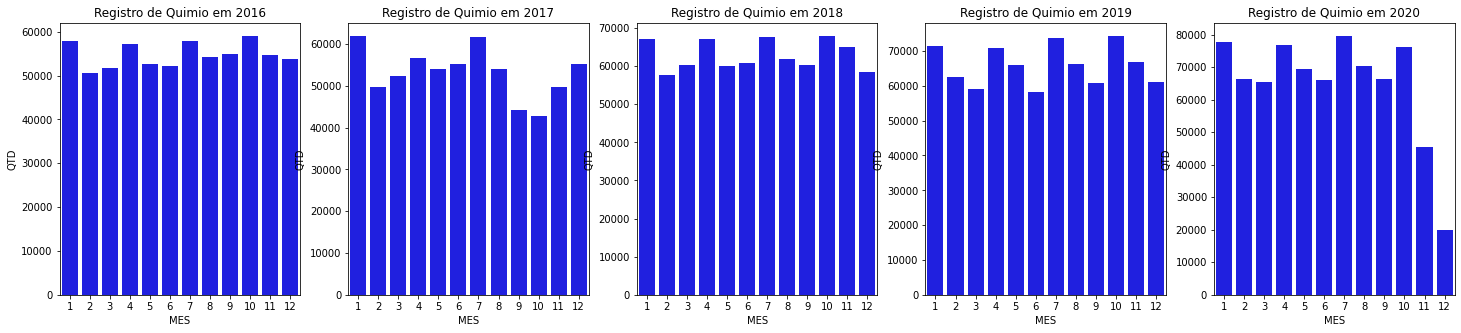

In [ ]:

fig, ax1 = plt.subplots(1, 5, figsize=(25, 5))

ano = 2016
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[0]).set_title('Registro de Quimio em '+str(ano))
ano = 2017
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[1]).set_title('Registro de Quimio em '+str(ano))
ano = 2018
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[2]).set_title('Registro de Quimio em '+str(ano))
ano = 2019
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[3]).set_title('Registro de Quimio em '+str(ano))
ano = 2020
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[4]).set_title('Registro de Quimio em '+str(ano))

In [ ]:
ano = 2016
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
df_brasil.QTD[filtro].sum()/12


54740.166666666664

In [ ]:
ano = 2017
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
df_brasil.QTD[filtro].sum()/12

53093.833333333336

In [ ]:
ano = 2018
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
df_brasil.QTD[filtro].sum()/12

62883.833333333336

In [ ]:
ano = 2019
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
df_brasil.QTD[filtro].sum()/12

65914.0

In [ ]:
ano = 2020
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
df_brasil.QTD[filtro].sum()/12

64921.5

In [ ]:
df_brasil.head()

,idx,TIPO,DATA,ANO,MES,QTD
0,0,QUIMIO,2017-02-28,2017,2,49612
1,1,QUIMIO,2018-02-28,2018,2,57559
2,2,QUIMIO,2019-02-28,2019,2,62497
3,3,QUIMIO,2016-02-29,2016,2,50561
4,4,QUIMIO,2020-02-29,2020,2,66298


In [ ]:
tipo = 'QUIMIO'
df_ano = df_brasil.groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo)
df_ano.QTD[filtro].sum()/5

723728.0

In [ ]:
tipo = 'QUIMIO'
df_ano = df_brasil.groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo) & (df_ano.ANO < 2020)
df_ano.QTD[filtro].sum()/4

709895.5

In [ ]:
df_ano.head(10)

,TIPO,ANO,QTD
0,COVID,2020,7675973
1,QUIMIO,2016,656882
2,QUIMIO,2017,637126
3,QUIMIO,2018,754606
4,QUIMIO,2019,790968
5,QUIMIO,2020,779058
6,RADIO,2019,7320
7,RADIO,2020,11118


Text(0.5, 1.0, 'Registro de Quimio por ano.')

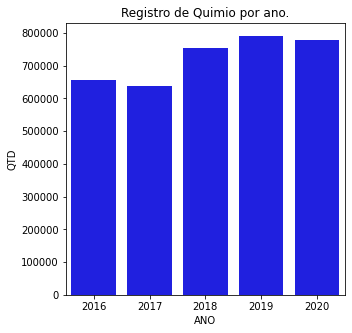

In [ ]:
tipo = 'QUIMIO'
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
df_ano = df_brasil.groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo)
sns.barplot(x='ANO', y='QTD', data=df_ano[filtro],color='blue', ax=ax1).set_title('Registro de Quimio por ano.')

# Radioterapia


In [ ]:
df_brasil.QTD[(df_brasil.ANO==2019) & (df_brasil.TIPO=='RADIO')].sum()/12

610.0

In [ ]:
df_brasil.QTD[(df_brasil.ANO==2020) & (df_brasil.TIPO=='RADIO')].sum()/12

926.5

Text(0.5, 1.0, 'Registro de Radioterapia em 2020')

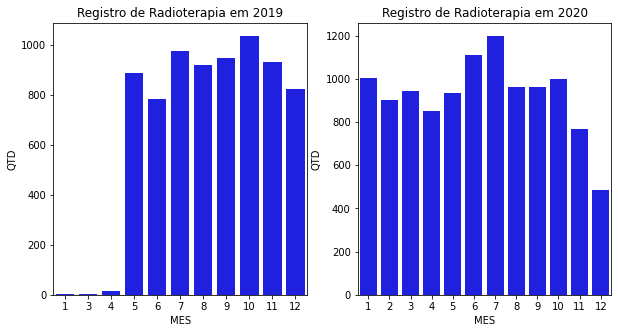

In [ ]:
fig, ax1 = plt.subplots(1, 2, figsize=(10, 5))

ano = 2019
tipo = 'RADIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[0]).set_title('Registro de Radioterapia em '+str(ano))
ano = 2020
tipo = 'RADIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[1]).set_title('Registro de Radioterapia em '+str(ano))

Text(0.5, 1.0, 'Registro de Radioterapia por ano.')

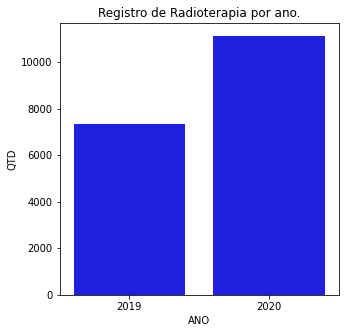

In [ ]:
tipo = 'RADIO'
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
df_ano = df_brasil.groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo)
sns.barplot(x='ANO', y='QTD', data=df_ano[filtro],color='blue', ax=ax1).set_title('Registro de Radioterapia por ano.')

In [ ]:
print('2019: ', df_brasil.QTD[(df_brasil.ANO==2019) & (df_brasil.TIPO=='RADIO')].sum() )
print('2020: ', df_brasil.QTD[(df_brasil.ANO==2020) & (df_brasil.TIPO=='RADIO')].sum() )

2019:  7320
2020:  11118


Text(0.5, 1.0, 'Registro de Radioterapia de maio a dezembro por ano.')

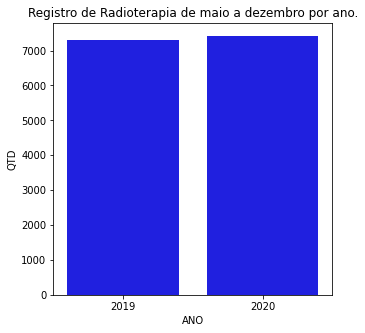

In [ ]:
tipo = 'RADIO'
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
df_ano = df_brasil[(df_brasil.MES > 4)].groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo) 
sns.barplot(x='ANO', y='QTD', data=df_ano[filtro],color='blue', ax=ax1).set_title('Registro de Radioterapia de maio a dezembro por ano.')

In [ ]:
tipo = 'RADIO'
df_ano = df_brasil[(df_brasil.MES > 4)].groupby(['TIPO', 'ANO'], as_index=False, dropna=False)['QTD'].sum()
filtro = (df_ano.TIPO == tipo) 
df_ano[filtro]

,TIPO,ANO,QTD
6,RADIO,2019,7295
7,RADIO,2020,7420


# COVID

In [ ]:
df_brasil.QTD[(df_brasil.TIPO == "COVID")].sum()

7675973

In [ ]:
df_brasil.QTD[(df_brasil.TIPO == "COVID")].sum() / 12

639664.4166666666

In [ ]:
df_brasil.QTD[(df_brasil.TIPO == "COVID")].sum() / 11

697815.7272727273

Text(0.5, 1.0, 'Registro de COVID-19 em 2020')

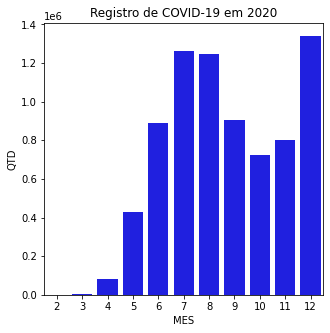

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ano=2020
tipo = 'COVID'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1).set_title('Registro de COVID-19 em '+str(ano))

# Todos de 2020


Text(0.5, 1.0, 'Registro em 2020')

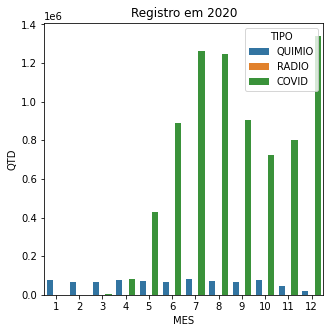

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ano=2020
filtro = (df_brasil.ANO == ano)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],hue='TIPO', ax=ax1).set_title('Registro em '+str(ano))

Text(0.5, 1.0, 'Registro de COVID-19 em 2020')

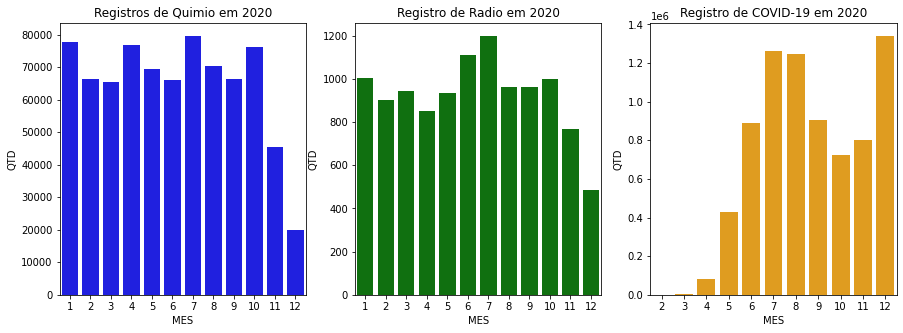

In [ ]:
fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
ano=2020
tipo = 'QUIMIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='blue', ax=ax1[0]).set_title('Registros de Quimio em '+str(ano))
tipo = 'RADIO'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='green', ax=ax1[1]).set_title('Registro de Radio em '+str(ano))
tipo = 'COVID'
filtro = (df_brasil.ANO == ano) & (df_brasil.TIPO == tipo)
sns.barplot(x='MES', y='QTD', data=df_brasil[filtro],color='orange', ax=ax1[2]).set_title('Registro de COVID-19 em '+str(ano))